In [1]:
import sys
import os
os.environ['CUDA_VISIBLE_DEVICES']='1'
sys.path.append("..")
from IPython.display import SVG
import keras
from keras.utils.vis_utils import model_to_dot
from models import autoencoderV7
from utils.data_preprocessing import encode_sequences, MinMaxScaler3D, shuffle_array
from utils.parsers import parse_bulkiness, parse_hydrophobicity, load_kabat, parse_csv, vdw_data, charge_index_data
from utils.defines import VL_LENGTH, VH_LENGTH

Using TensorFlow backend.


In [2]:
# VL_sequences, VH_sequences, names_mask, animals_mask = load_kabat('../data/kabat_animals.html')
VL_sequences, VH_sequences, names_mask, animals_mask = \
    parse_csv(VH_LENGTH, VL_LENGTH,
              "../data/abysis_data_201801/abysis_data/emblig-20180125-7578.csv",
              "../data/abysis_data_201801/abysis_data/kabat-20180117-10288.csv")

In [3]:
h_data = parse_hydrophobicity('../data/consensus.hpb')
bulkiness_data = parse_bulkiness('../data/amino_acid_bulkiness.txt')

DATASETS = [h_data, bulkiness_data, vdw_data, charge_index_data]

ss_VH = MinMaxScaler3D(mask=0)
ss_VL = MinMaxScaler3D(mask=0)

VH_encoded = encode_sequences(VH_sequences, VH_LENGTH, DATASETS)
VL_encoded = encode_sequences(VL_sequences, VL_LENGTH, DATASETS)

VH_encoded = ss_VH.fit_transform(VH_encoded)
VL_encoded = ss_VL.fit_transform(VL_encoded)

VH_encoded_shuffled, VL_encoded_shuffled = shuffle_array(VH_encoded, VL_encoded)

In [4]:
encoder, autoencoder, sess = autoencoderV7(4, latent_dim=20, cuda_device=1,RNN_cell='LSTM')

W0412 11:39:53.586880 140657758078784 deprecation.py:237] From /home/gil/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4139: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



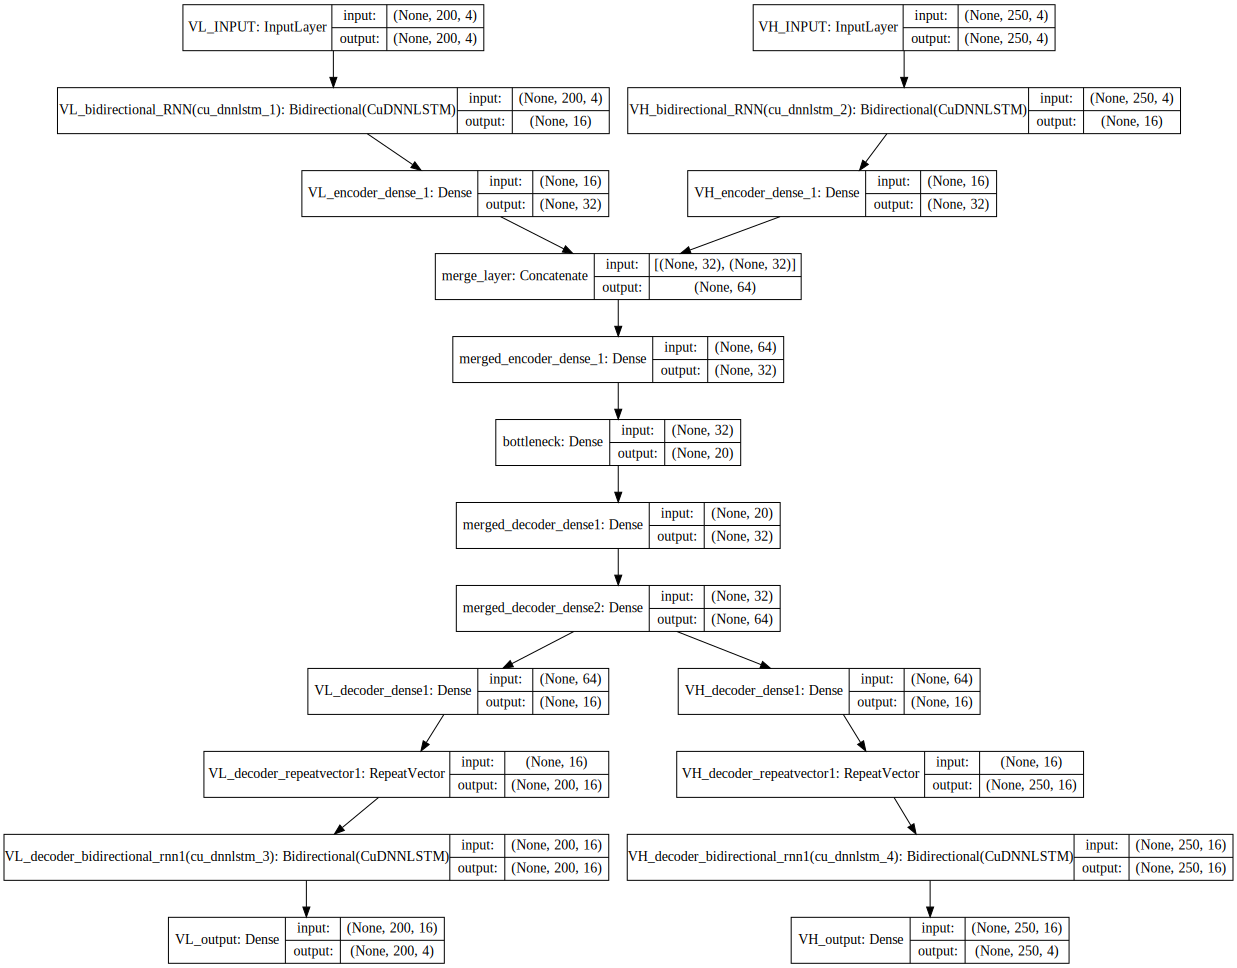

In [5]:
SVG(model_to_dot(autoencoder, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
autoencoder.count_params()

23164

In [7]:
NAME= 'autoencoderV7'
RUN = 'run2'

weight_path = '../model_weights/{}/{}/{}_allfeatures.hdf5'.format(NAME,RUN,NAME)
log_path = '../logs/{}/{}'.format(NAME, RUN)

if not os.path.exists('../model_weights/{}/{}/'.format(NAME,RUN)):
    if not os.path.exists('../model_weights/{}'.format(NAME)):
        os.mkdir('../model_weights/{}'.format(NAME))
    os.mkdir('../model_weights/{}/{}'.format(NAME,RUN))

In [8]:
history = autoencoder.fit([VL_encoded_shuffled, VH_encoded_shuffled], [VL_encoded_shuffled, VH_encoded_shuffled],
                          epochs=2000, batch_size=32, validation_split=0.2,
                          callbacks=[keras.callbacks.ModelCheckpoint(weight_path, save_best_only=True),
                                     keras.callbacks.TensorBoard(log_path)])

Train on 4144 samples, validate on 1036 samples
Epoch 1/2000
4144/4144 [==============================] - 11s 3ms/step - loss: 0.6241 - VL_output_loss: 0.3186 - VH_output_loss: 0.3054 - val_loss: 0.5251 - val_VL_output_loss: 0.2607 - val_VH_output_loss: 0.2643
Epoch 2/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.5225 - VL_output_loss: 0.2592 - VH_output_loss: 0.2634 - val_loss: 0.5201 - val_VL_output_loss: 0.2577 - val_VH_output_loss: 0.2624
Epoch 3/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.5192 - VL_output_loss: 0.2572 - VH_output_loss: 0.2620 - val_loss: 0.5181 - val_VL_output_loss: 0.2565 - val_VH_output_loss: 0.2615
Epoch 4/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.5174 - VL_output_loss: 0.2564 - VH_output_loss: 0.2611 - val_loss: 0.5164 - val_VL_output_loss: 0.2559 - val_VH_output_loss: 0.2605
Epoch 5/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.5161 - VL_output_loss: 

4144/4144 [==============================] - 8s 2ms/step - loss: 0.4613 - VL_output_loss: 0.2251 - VH_output_loss: 0.2362 - val_loss: 0.4602 - val_VL_output_loss: 0.2243 - val_VH_output_loss: 0.2359
Epoch 40/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.4584 - VL_output_loss: 0.2233 - VH_output_loss: 0.2350 - val_loss: 0.4602 - val_VL_output_loss: 0.2252 - val_VH_output_loss: 0.2349
Epoch 41/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.4572 - VL_output_loss: 0.2228 - VH_output_loss: 0.2344 - val_loss: 0.4594 - val_VL_output_loss: 0.2238 - val_VH_output_loss: 0.2356
Epoch 42/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.4553 - VL_output_loss: 0.2217 - VH_output_loss: 0.2337 - val_loss: 0.4586 - val_VL_output_loss: 0.2242 - val_VH_output_loss: 0.2344
Epoch 43/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.4539 - VL_output_loss: 0.2216 - VH_output_loss: 0.2324 - val_loss: 0.4542 - val_V

4144/4144 [==============================] - 8s 2ms/step - loss: 0.4216 - VL_output_loss: 0.2016 - VH_output_loss: 0.2200 - val_loss: 0.4232 - val_VL_output_loss: 0.2023 - val_VH_output_loss: 0.2209
Epoch 78/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.4218 - VL_output_loss: 0.2017 - VH_output_loss: 0.2200 - val_loss: 0.4217 - val_VL_output_loss: 0.2010 - val_VH_output_loss: 0.2207
Epoch 79/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.4217 - VL_output_loss: 0.2019 - VH_output_loss: 0.2198 - val_loss: 0.4256 - val_VL_output_loss: 0.2043 - val_VH_output_loss: 0.2212
Epoch 80/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.4196 - VL_output_loss: 0.2002 - VH_output_loss: 0.2194 - val_loss: 0.4225 - val_VL_output_loss: 0.1997 - val_VH_output_loss: 0.2227
Epoch 81/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.4200 - VL_output_loss: 0.2006 - VH_output_loss: 0.2194 - val_loss: 0.4238 - val_V

4144/4144 [==============================] - 8s 2ms/step - loss: 0.4041 - VL_output_loss: 0.1928 - VH_output_loss: 0.2113 - val_loss: 0.4070 - val_VL_output_loss: 0.1943 - val_VH_output_loss: 0.2126
Epoch 116/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.4034 - VL_output_loss: 0.1927 - VH_output_loss: 0.2107 - val_loss: 0.4068 - val_VL_output_loss: 0.1947 - val_VH_output_loss: 0.2121
Epoch 117/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.4039 - VL_output_loss: 0.1931 - VH_output_loss: 0.2108 - val_loss: 0.4085 - val_VL_output_loss: 0.1965 - val_VH_output_loss: 0.2120
Epoch 118/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.4024 - VL_output_loss: 0.1920 - VH_output_loss: 0.2104 - val_loss: 0.4049 - val_VL_output_loss: 0.1924 - val_VH_output_loss: 0.2125
Epoch 119/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.4033 - VL_output_loss: 0.1927 - VH_output_loss: 0.2106 - val_loss: 0.4104 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3888 - VL_output_loss: 0.1852 - VH_output_loss: 0.2036 - val_loss: 0.3914 - val_VL_output_loss: 0.1866 - val_VH_output_loss: 0.2048
Epoch 154/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3891 - VL_output_loss: 0.1858 - VH_output_loss: 0.2033 - val_loss: 0.3966 - val_VL_output_loss: 0.1913 - val_VH_output_loss: 0.2054
Epoch 155/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3888 - VL_output_loss: 0.1855 - VH_output_loss: 0.2033 - val_loss: 0.3926 - val_VL_output_loss: 0.1872 - val_VH_output_loss: 0.2053
Epoch 156/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3885 - VL_output_loss: 0.1852 - VH_output_loss: 0.2033 - val_loss: 0.3977 - val_VL_output_loss: 0.1913 - val_VH_output_loss: 0.2064
Epoch 157/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3887 - VL_output_loss: 0.1859 - VH_output_loss: 0.2028 - val_loss: 0.3902 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3771 - VL_output_loss: 0.1794 - VH_output_loss: 0.1977 - val_loss: 0.3812 - val_VL_output_loss: 0.1802 - val_VH_output_loss: 0.2011
Epoch 192/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3771 - VL_output_loss: 0.1793 - VH_output_loss: 0.1977 - val_loss: 0.3794 - val_VL_output_loss: 0.1808 - val_VH_output_loss: 0.1986
Epoch 193/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3770 - VL_output_loss: 0.1794 - VH_output_loss: 0.1976 - val_loss: 0.3786 - val_VL_output_loss: 0.1799 - val_VH_output_loss: 0.1987
Epoch 194/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3775 - VL_output_loss: 0.1799 - VH_output_loss: 0.1975 - val_loss: 0.3793 - val_VL_output_loss: 0.1798 - val_VH_output_loss: 0.1995
Epoch 195/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3774 - VL_output_loss: 0.1803 - VH_output_loss: 0.1970 - val_loss: 0.3820 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3682 - VL_output_loss: 0.1752 - VH_output_loss: 0.1930 - val_loss: 0.3880 - val_VL_output_loss: 0.1920 - val_VH_output_loss: 0.1960
Epoch 230/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3694 - VL_output_loss: 0.1768 - VH_output_loss: 0.1926 - val_loss: 0.3705 - val_VL_output_loss: 0.1747 - val_VH_output_loss: 0.1958
Epoch 231/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3661 - VL_output_loss: 0.1738 - VH_output_loss: 0.1922 - val_loss: 0.3688 - val_VL_output_loss: 0.1743 - val_VH_output_loss: 0.1945
Epoch 232/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3669 - VL_output_loss: 0.1743 - VH_output_loss: 0.1926 - val_loss: 0.3758 - val_VL_output_loss: 0.1817 - val_VH_output_loss: 0.1941
Epoch 233/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3683 - VL_output_loss: 0.1763 - VH_output_loss: 0.1920 - val_loss: 0.3706 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3590 - VL_output_loss: 0.1705 - VH_output_loss: 0.1885 - val_loss: 0.3645 - val_VL_output_loss: 0.1714 - val_VH_output_loss: 0.1931
Epoch 268/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3595 - VL_output_loss: 0.1698 - VH_output_loss: 0.1897 - val_loss: 0.3627 - val_VL_output_loss: 0.1711 - val_VH_output_loss: 0.1917
Epoch 269/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3594 - VL_output_loss: 0.1710 - VH_output_loss: 0.1884 - val_loss: 0.3636 - val_VL_output_loss: 0.1724 - val_VH_output_loss: 0.1913
Epoch 270/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3596 - VL_output_loss: 0.1714 - VH_output_loss: 0.1882 - val_loss: 0.3638 - val_VL_output_loss: 0.1722 - val_VH_output_loss: 0.1915
Epoch 271/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3606 - VL_output_loss: 0.1716 - VH_output_loss: 0.1890 - val_loss: 0.3655 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3548 - VL_output_loss: 0.1693 - VH_output_loss: 0.1854 - val_loss: 0.3592 - val_VL_output_loss: 0.1700 - val_VH_output_loss: 0.1892
Epoch 306/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3544 - VL_output_loss: 0.1685 - VH_output_loss: 0.1859 - val_loss: 0.3583 - val_VL_output_loss: 0.1690 - val_VH_output_loss: 0.1893
Epoch 307/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3532 - VL_output_loss: 0.1674 - VH_output_loss: 0.1859 - val_loss: 0.3604 - val_VL_output_loss: 0.1714 - val_VH_output_loss: 0.1890
Epoch 308/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3548 - VL_output_loss: 0.1695 - VH_output_loss: 0.1852 - val_loss: 0.3590 - val_VL_output_loss: 0.1707 - val_VH_output_loss: 0.1883
Epoch 309/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3532 - VL_output_loss: 0.1674 - VH_output_loss: 0.1858 - val_loss: 0.3580 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3501 - VL_output_loss: 0.1663 - VH_output_loss: 0.1838 - val_loss: 0.3583 - val_VL_output_loss: 0.1674 - val_VH_output_loss: 0.1910
Epoch 344/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3502 - VL_output_loss: 0.1667 - VH_output_loss: 0.1835 - val_loss: 0.3546 - val_VL_output_loss: 0.1679 - val_VH_output_loss: 0.1867
Epoch 345/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3484 - VL_output_loss: 0.1648 - VH_output_loss: 0.1837 - val_loss: 0.3539 - val_VL_output_loss: 0.1661 - val_VH_output_loss: 0.1878
Epoch 346/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3502 - VL_output_loss: 0.1666 - VH_output_loss: 0.1836 - val_loss: 0.3553 - val_VL_output_loss: 0.1677 - val_VH_output_loss: 0.1875
Epoch 347/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3486 - VL_output_loss: 0.1651 - VH_output_loss: 0.1836 - val_loss: 0.3523 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3471 - VL_output_loss: 0.1657 - VH_output_loss: 0.1814 - val_loss: 0.3505 - val_VL_output_loss: 0.1662 - val_VH_output_loss: 0.1842
Epoch 382/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3455 - VL_output_loss: 0.1635 - VH_output_loss: 0.1820 - val_loss: 0.3519 - val_VL_output_loss: 0.1666 - val_VH_output_loss: 0.1852
Epoch 383/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3466 - VL_output_loss: 0.1651 - VH_output_loss: 0.1815 - val_loss: 0.3524 - val_VL_output_loss: 0.1676 - val_VH_output_loss: 0.1849
Epoch 384/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3461 - VL_output_loss: 0.1645 - VH_output_loss: 0.1816 - val_loss: 0.3762 - val_VL_output_loss: 0.1896 - val_VH_output_loss: 0.1865
Epoch 385/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3464 - VL_output_loss: 0.1645 - VH_output_loss: 0.1819 - val_loss: 0.3510 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3408 - VL_output_loss: 0.1618 - VH_output_loss: 0.1790 - val_loss: 0.3459 - val_VL_output_loss: 0.1633 - val_VH_output_loss: 0.1827
Epoch 420/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3404 - VL_output_loss: 0.1613 - VH_output_loss: 0.1791 - val_loss: 0.3475 - val_VL_output_loss: 0.1636 - val_VH_output_loss: 0.1839
Epoch 421/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3408 - VL_output_loss: 0.1613 - VH_output_loss: 0.1795 - val_loss: 0.3457 - val_VL_output_loss: 0.1632 - val_VH_output_loss: 0.1825
Epoch 422/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3451 - VL_output_loss: 0.1660 - VH_output_loss: 0.1791 - val_loss: 0.3460 - val_VL_output_loss: 0.1635 - val_VH_output_loss: 0.1824
Epoch 423/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3406 - VL_output_loss: 0.1612 - VH_output_loss: 0.1794 - val_loss: 0.3452 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3378 - VL_output_loss: 0.1602 - VH_output_loss: 0.1777 - val_loss: 0.3422 - val_VL_output_loss: 0.1618 - val_VH_output_loss: 0.1804
Epoch 458/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3404 - VL_output_loss: 0.1636 - VH_output_loss: 0.1768 - val_loss: 0.3432 - val_VL_output_loss: 0.1628 - val_VH_output_loss: 0.1805
Epoch 459/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3396 - VL_output_loss: 0.1624 - VH_output_loss: 0.1772 - val_loss: 0.3413 - val_VL_output_loss: 0.1610 - val_VH_output_loss: 0.1802
Epoch 460/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3373 - VL_output_loss: 0.1599 - VH_output_loss: 0.1774 - val_loss: 0.3431 - val_VL_output_loss: 0.1621 - val_VH_output_loss: 0.1810
Epoch 461/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3412 - VL_output_loss: 0.1635 - VH_output_loss: 0.1777 - val_loss: 0.3511 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3338 - VL_output_loss: 0.1590 - VH_output_loss: 0.1748 - val_loss: 0.3386 - val_VL_output_loss: 0.1591 - val_VH_output_loss: 0.1794
Epoch 496/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3324 - VL_output_loss: 0.1572 - VH_output_loss: 0.1751 - val_loss: 0.3385 - val_VL_output_loss: 0.1593 - val_VH_output_loss: 0.1792
Epoch 497/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3324 - VL_output_loss: 0.1569 - VH_output_loss: 0.1754 - val_loss: 0.3405 - val_VL_output_loss: 0.1600 - val_VH_output_loss: 0.1805
Epoch 498/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3365 - VL_output_loss: 0.1614 - VH_output_loss: 0.1751 - val_loss: 0.3382 - val_VL_output_loss: 0.1596 - val_VH_output_loss: 0.1786
Epoch 499/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3315 - VL_output_loss: 0.1569 - VH_output_loss: 0.1747 - val_loss: 0.3383 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3304 - VL_output_loss: 0.1572 - VH_output_loss: 0.1733 - val_loss: 0.3380 - val_VL_output_loss: 0.1596 - val_VH_output_loss: 0.1784
Epoch 534/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3315 - VL_output_loss: 0.1581 - VH_output_loss: 0.1734 - val_loss: 0.3409 - val_VL_output_loss: 0.1614 - val_VH_output_loss: 0.1794
Epoch 535/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3381 - VL_output_loss: 0.1640 - VH_output_loss: 0.1741 - val_loss: 0.3370 - val_VL_output_loss: 0.1595 - val_VH_output_loss: 0.1774
Epoch 536/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3287 - VL_output_loss: 0.1558 - VH_output_loss: 0.1730 - val_loss: 0.3339 - val_VL_output_loss: 0.1569 - val_VH_output_loss: 0.1770
Epoch 537/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3293 - VL_output_loss: 0.1555 - VH_output_loss: 0.1737 - val_loss: 0.3374 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3280 - VL_output_loss: 0.1567 - VH_output_loss: 0.1713 - val_loss: 0.3348 - val_VL_output_loss: 0.1598 - val_VH_output_loss: 0.1750
Epoch 572/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3264 - VL_output_loss: 0.1558 - VH_output_loss: 0.1706 - val_loss: 0.3450 - val_VL_output_loss: 0.1702 - val_VH_output_loss: 0.1748
Epoch 573/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3248 - VL_output_loss: 0.1539 - VH_output_loss: 0.1709 - val_loss: 0.3306 - val_VL_output_loss: 0.1554 - val_VH_output_loss: 0.1752
Epoch 574/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3231 - VL_output_loss: 0.1530 - VH_output_loss: 0.1701 - val_loss: 0.3297 - val_VL_output_loss: 0.1554 - val_VH_output_loss: 0.1744
Epoch 575/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3247 - VL_output_loss: 0.1547 - VH_output_loss: 0.1701 - val_loss: 0.3300 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3269 - VL_output_loss: 0.1575 - VH_output_loss: 0.1694 - val_loss: 0.3350 - val_VL_output_loss: 0.1610 - val_VH_output_loss: 0.1740
Epoch 610/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3391 - VL_output_loss: 0.1687 - VH_output_loss: 0.1703 - val_loss: 0.3367 - val_VL_output_loss: 0.1628 - val_VH_output_loss: 0.1739
Epoch 611/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3250 - VL_output_loss: 0.1559 - VH_output_loss: 0.1691 - val_loss: 0.3320 - val_VL_output_loss: 0.1562 - val_VH_output_loss: 0.1758
Epoch 612/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3213 - VL_output_loss: 0.1534 - VH_output_loss: 0.1679 - val_loss: 0.3282 - val_VL_output_loss: 0.1562 - val_VH_output_loss: 0.1720
Epoch 613/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3295 - VL_output_loss: 0.1598 - VH_output_loss: 0.1698 - val_loss: 0.3300 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3156 - VL_output_loss: 0.1496 - VH_output_loss: 0.1660 - val_loss: 0.3233 - val_VL_output_loss: 0.1531 - val_VH_output_loss: 0.1703
Epoch 648/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3182 - VL_output_loss: 0.1525 - VH_output_loss: 0.1657 - val_loss: 0.3312 - val_VL_output_loss: 0.1610 - val_VH_output_loss: 0.1702
Epoch 649/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3204 - VL_output_loss: 0.1542 - VH_output_loss: 0.1662 - val_loss: 0.3288 - val_VL_output_loss: 0.1535 - val_VH_output_loss: 0.1753
Epoch 650/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3194 - VL_output_loss: 0.1540 - VH_output_loss: 0.1654 - val_loss: 0.3381 - val_VL_output_loss: 0.1679 - val_VH_output_loss: 0.1702
Epoch 651/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3187 - VL_output_loss: 0.1536 - VH_output_loss: 0.1651 - val_loss: 0.3214 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3138 - VL_output_loss: 0.1499 - VH_output_loss: 0.1639 - val_loss: 0.3217 - val_VL_output_loss: 0.1503 - val_VH_output_loss: 0.1714
Epoch 686/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3148 - VL_output_loss: 0.1508 - VH_output_loss: 0.1640 - val_loss: 0.3217 - val_VL_output_loss: 0.1529 - val_VH_output_loss: 0.1688
Epoch 687/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3122 - VL_output_loss: 0.1492 - VH_output_loss: 0.1630 - val_loss: 0.3229 - val_VL_output_loss: 0.1543 - val_VH_output_loss: 0.1686
Epoch 688/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3106 - VL_output_loss: 0.1476 - VH_output_loss: 0.1630 - val_loss: 0.3182 - val_VL_output_loss: 0.1495 - val_VH_output_loss: 0.1687
Epoch 689/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3152 - VL_output_loss: 0.1506 - VH_output_loss: 0.1645 - val_loss: 0.3228 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3076 - VL_output_loss: 0.1461 - VH_output_loss: 0.1615 - val_loss: 0.3172 - val_VL_output_loss: 0.1488 - val_VH_output_loss: 0.1684
Epoch 724/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3120 - VL_output_loss: 0.1495 - VH_output_loss: 0.1625 - val_loss: 0.3196 - val_VL_output_loss: 0.1526 - val_VH_output_loss: 0.1669
Epoch 725/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3090 - VL_output_loss: 0.1468 - VH_output_loss: 0.1622 - val_loss: 0.3155 - val_VL_output_loss: 0.1487 - val_VH_output_loss: 0.1668
Epoch 726/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3069 - VL_output_loss: 0.1459 - VH_output_loss: 0.1609 - val_loss: 0.3145 - val_VL_output_loss: 0.1481 - val_VH_output_loss: 0.1664
Epoch 727/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3098 - VL_output_loss: 0.1477 - VH_output_loss: 0.1621 - val_loss: 0.3153 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3059 - VL_output_loss: 0.1459 - VH_output_loss: 0.1600 - val_loss: 0.3168 - val_VL_output_loss: 0.1501 - val_VH_output_loss: 0.1667
Epoch 762/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3096 - VL_output_loss: 0.1495 - VH_output_loss: 0.1601 - val_loss: 0.3140 - val_VL_output_loss: 0.1486 - val_VH_output_loss: 0.1654
Epoch 763/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3064 - VL_output_loss: 0.1463 - VH_output_loss: 0.1601 - val_loss: 0.3145 - val_VL_output_loss: 0.1487 - val_VH_output_loss: 0.1658
Epoch 764/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3056 - VL_output_loss: 0.1455 - VH_output_loss: 0.1601 - val_loss: 0.3146 - val_VL_output_loss: 0.1484 - val_VH_output_loss: 0.1661
Epoch 765/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3056 - VL_output_loss: 0.1449 - VH_output_loss: 0.1607 - val_loss: 0.3126 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3124 - VL_output_loss: 0.1534 - VH_output_loss: 0.1590 - val_loss: 0.3264 - val_VL_output_loss: 0.1575 - val_VH_output_loss: 0.1689
Epoch 800/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3052 - VL_output_loss: 0.1459 - VH_output_loss: 0.1593 - val_loss: 0.3121 - val_VL_output_loss: 0.1478 - val_VH_output_loss: 0.1643
Epoch 801/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3046 - VL_output_loss: 0.1447 - VH_output_loss: 0.1599 - val_loss: 0.3133 - val_VL_output_loss: 0.1468 - val_VH_output_loss: 0.1665
Epoch 802/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3106 - VL_output_loss: 0.1515 - VH_output_loss: 0.1591 - val_loss: 0.3114 - val_VL_output_loss: 0.1468 - val_VH_output_loss: 0.1646
Epoch 803/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3034 - VL_output_loss: 0.1441 - VH_output_loss: 0.1593 - val_loss: 0.3163 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3001 - VL_output_loss: 0.1430 - VH_output_loss: 0.1571 - val_loss: 0.3086 - val_VL_output_loss: 0.1458 - val_VH_output_loss: 0.1628
Epoch 838/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3025 - VL_output_loss: 0.1450 - VH_output_loss: 0.1576 - val_loss: 0.3137 - val_VL_output_loss: 0.1494 - val_VH_output_loss: 0.1643
Epoch 839/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3026 - VL_output_loss: 0.1454 - VH_output_loss: 0.1572 - val_loss: 0.3079 - val_VL_output_loss: 0.1454 - val_VH_output_loss: 0.1625
Epoch 840/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3003 - VL_output_loss: 0.1428 - VH_output_loss: 0.1575 - val_loss: 0.3088 - val_VL_output_loss: 0.1458 - val_VH_output_loss: 0.1630
Epoch 841/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3023 - VL_output_loss: 0.1445 - VH_output_loss: 0.1578 - val_loss: 0.3117 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.3006 - VL_output_loss: 0.1435 - VH_output_loss: 0.1570 - val_loss: 0.3091 - val_VL_output_loss: 0.1468 - val_VH_output_loss: 0.1623
Epoch 876/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3007 - VL_output_loss: 0.1430 - VH_output_loss: 0.1577 - val_loss: 0.3216 - val_VL_output_loss: 0.1591 - val_VH_output_loss: 0.1625
Epoch 877/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2979 - VL_output_loss: 0.1421 - VH_output_loss: 0.1558 - val_loss: 0.3067 - val_VL_output_loss: 0.1448 - val_VH_output_loss: 0.1619
Epoch 878/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3001 - VL_output_loss: 0.1436 - VH_output_loss: 0.1565 - val_loss: 0.3121 - val_VL_output_loss: 0.1489 - val_VH_output_loss: 0.1632
Epoch 879/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3024 - VL_output_loss: 0.1460 - VH_output_loss: 0.1564 - val_loss: 0.3066 - v

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2966 - VL_output_loss: 0.1409 - VH_output_loss: 0.1557 - val_loss: 0.3064 - val_VL_output_loss: 0.1443 - val_VH_output_loss: 0.1621
Epoch 914/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3042 - VL_output_loss: 0.1481 - VH_output_loss: 0.1561 - val_loss: 0.3072 - val_VL_output_loss: 0.1459 - val_VH_output_loss: 0.1613
Epoch 915/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2974 - VL_output_loss: 0.1418 - VH_output_loss: 0.1556 - val_loss: 0.3060 - val_VL_output_loss: 0.1446 - val_VH_output_loss: 0.1615
Epoch 916/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2966 - VL_output_loss: 0.1410 - VH_output_loss: 0.1556 - val_loss: 0.3093 - val_VL_output_loss: 0.1469 - val_VH_output_loss: 0.1624
Epoch 917/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2990 - VL_output_loss: 0.1433 - VH_output_loss: 0.1557 - val_loss: 0.3054 - v

4144/4144 [==============================] - 7s 2ms/step - loss: 0.2952 - VL_output_loss: 0.1404 - VH_output_loss: 0.1548 - val_loss: 0.3051 - val_VL_output_loss: 0.1435 - val_VH_output_loss: 0.1615
Epoch 952/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2947 - VL_output_loss: 0.1402 - VH_output_loss: 0.1545 - val_loss: 0.3057 - val_VL_output_loss: 0.1422 - val_VH_output_loss: 0.1635
Epoch 953/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2946 - VL_output_loss: 0.1397 - VH_output_loss: 0.1549 - val_loss: 0.3037 - val_VL_output_loss: 0.1428 - val_VH_output_loss: 0.1609
Epoch 954/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.3083 - VL_output_loss: 0.1536 - VH_output_loss: 0.1547 - val_loss: 0.3036 - val_VL_output_loss: 0.1432 - val_VH_output_loss: 0.1604
Epoch 955/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2958 - VL_output_loss: 0.1413 - VH_output_loss: 0.1545 - val_loss: 0.3036 - v

4144/4144 [==============================] - 7s 2ms/step - loss: 0.2930 - VL_output_loss: 0.1392 - VH_output_loss: 0.1538 - val_loss: 0.3022 - val_VL_output_loss: 0.1417 - val_VH_output_loss: 0.1605
Epoch 990/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2932 - VL_output_loss: 0.1399 - VH_output_loss: 0.1533 - val_loss: 0.3196 - val_VL_output_loss: 0.1586 - val_VH_output_loss: 0.1611
Epoch 991/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.3014 - VL_output_loss: 0.1458 - VH_output_loss: 0.1556 - val_loss: 0.3110 - val_VL_output_loss: 0.1498 - val_VH_output_loss: 0.1612
Epoch 992/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.3045 - VL_output_loss: 0.1506 - VH_output_loss: 0.1539 - val_loss: 0.3030 - val_VL_output_loss: 0.1439 - val_VH_output_loss: 0.1591
Epoch 993/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2920 - VL_output_loss: 0.1389 - VH_output_loss: 0.1530 - val_loss: 0.3006 - v

4144/4144 [==============================] - 7s 2ms/step - loss: 0.2898 - VL_output_loss: 0.1379 - VH_output_loss: 0.1519 - val_loss: 0.2992 - val_VL_output_loss: 0.1403 - val_VH_output_loss: 0.1588
Epoch 1028/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2915 - VL_output_loss: 0.1388 - VH_output_loss: 0.1526 - val_loss: 0.3129 - val_VL_output_loss: 0.1536 - val_VH_output_loss: 0.1593
Epoch 1029/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2957 - VL_output_loss: 0.1419 - VH_output_loss: 0.1539 - val_loss: 0.3024 - val_VL_output_loss: 0.1432 - val_VH_output_loss: 0.1592
Epoch 1030/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.3012 - VL_output_loss: 0.1479 - VH_output_loss: 0.1533 - val_loss: 0.3039 - val_VL_output_loss: 0.1442 - val_VH_output_loss: 0.1597
Epoch 1031/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2940 - VL_output_loss: 0.1397 - VH_output_loss: 0.1543 - val_loss: 0.3014

4144/4144 [==============================] - 7s 2ms/step - loss: 0.2883 - VL_output_loss: 0.1365 - VH_output_loss: 0.1518 - val_loss: 0.3047 - val_VL_output_loss: 0.1410 - val_VH_output_loss: 0.1637
Epoch 1066/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2908 - VL_output_loss: 0.1374 - VH_output_loss: 0.1535 - val_loss: 0.2987 - val_VL_output_loss: 0.1392 - val_VH_output_loss: 0.1595
Epoch 1067/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2892 - VL_output_loss: 0.1375 - VH_output_loss: 0.1517 - val_loss: 0.3009 - val_VL_output_loss: 0.1416 - val_VH_output_loss: 0.1593
Epoch 1068/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2894 - VL_output_loss: 0.1374 - VH_output_loss: 0.1519 - val_loss: 0.2996 - val_VL_output_loss: 0.1411 - val_VH_output_loss: 0.1585
Epoch 1069/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2906 - VL_output_loss: 0.1387 - VH_output_loss: 0.1519 - val_loss: 0.2976

4144/4144 [==============================] - 7s 2ms/step - loss: 0.2865 - VL_output_loss: 0.1358 - VH_output_loss: 0.1508 - val_loss: 0.2950 - val_VL_output_loss: 0.1379 - val_VH_output_loss: 0.1571
Epoch 1104/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2888 - VL_output_loss: 0.1359 - VH_output_loss: 0.1528 - val_loss: 0.3030 - val_VL_output_loss: 0.1410 - val_VH_output_loss: 0.1620
Epoch 1105/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2916 - VL_output_loss: 0.1409 - VH_output_loss: 0.1507 - val_loss: 0.2945 - val_VL_output_loss: 0.1375 - val_VH_output_loss: 0.1570
Epoch 1106/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2852 - VL_output_loss: 0.1348 - VH_output_loss: 0.1504 - val_loss: 0.2955 - val_VL_output_loss: 0.1384 - val_VH_output_loss: 0.1571
Epoch 1107/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2865 - VL_output_loss: 0.1361 - VH_output_loss: 0.1504 - val_loss: 0.2979

4144/4144 [==============================] - 7s 2ms/step - loss: 0.2958 - VL_output_loss: 0.1447 - VH_output_loss: 0.1512 - val_loss: 0.2977 - val_VL_output_loss: 0.1403 - val_VH_output_loss: 0.1574
Epoch 1142/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2848 - VL_output_loss: 0.1343 - VH_output_loss: 0.1505 - val_loss: 0.2982 - val_VL_output_loss: 0.1386 - val_VH_output_loss: 0.1597
Epoch 1143/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2887 - VL_output_loss: 0.1382 - VH_output_loss: 0.1505 - val_loss: 0.4321 - val_VL_output_loss: 0.2748 - val_VH_output_loss: 0.1573
Epoch 1144/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.3063 - VL_output_loss: 0.1560 - VH_output_loss: 0.1503 - val_loss: 0.2940 - val_VL_output_loss: 0.1368 - val_VH_output_loss: 0.1572
Epoch 1145/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2845 - VL_output_loss: 0.1340 - VH_output_loss: 0.1505 - val_loss: 0.2933

4144/4144 [==============================] - 7s 2ms/step - loss: 0.2843 - VL_output_loss: 0.1339 - VH_output_loss: 0.1503 - val_loss: 0.2931 - val_VL_output_loss: 0.1368 - val_VH_output_loss: 0.1563
Epoch 1180/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2854 - VL_output_loss: 0.1342 - VH_output_loss: 0.1512 - val_loss: 0.2950 - val_VL_output_loss: 0.1391 - val_VH_output_loss: 0.1559
Epoch 1181/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2838 - VL_output_loss: 0.1348 - VH_output_loss: 0.1490 - val_loss: 0.2927 - val_VL_output_loss: 0.1367 - val_VH_output_loss: 0.1559
Epoch 1182/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2816 - VL_output_loss: 0.1332 - VH_output_loss: 0.1484 - val_loss: 0.2953 - val_VL_output_loss: 0.1373 - val_VH_output_loss: 0.1580
Epoch 1183/2000
4144/4144 [==============================] - 7s 2ms/step - loss: 0.2832 - VL_output_loss: 0.1342 - VH_output_loss: 0.1490 - val_loss: 0.2926

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2866 - VL_output_loss: 0.1367 - VH_output_loss: 0.1499 - val_loss: 0.2944 - val_VL_output_loss: 0.1371 - val_VH_output_loss: 0.1572
Epoch 1218/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2836 - VL_output_loss: 0.1342 - VH_output_loss: 0.1495 - val_loss: 0.2923 - val_VL_output_loss: 0.1365 - val_VH_output_loss: 0.1558
Epoch 1219/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2813 - VL_output_loss: 0.1326 - VH_output_loss: 0.1486 - val_loss: 0.2941 - val_VL_output_loss: 0.1357 - val_VH_output_loss: 0.1584
Epoch 1220/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2919 - VL_output_loss: 0.1417 - VH_output_loss: 0.1502 - val_loss: 0.2946 - val_VL_output_loss: 0.1374 - val_VH_output_loss: 0.1572
Epoch 1221/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2827 - VL_output_loss: 0.1328 - VH_output_loss: 0.1499 - val_loss: 0.2910

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2790 - VL_output_loss: 0.1312 - VH_output_loss: 0.1477 - val_loss: 0.2903 - val_VL_output_loss: 0.1353 - val_VH_output_loss: 0.1550
Epoch 1256/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2791 - VL_output_loss: 0.1313 - VH_output_loss: 0.1478 - val_loss: 0.2894 - val_VL_output_loss: 0.1348 - val_VH_output_loss: 0.1545
Epoch 1257/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2807 - VL_output_loss: 0.1319 - VH_output_loss: 0.1487 - val_loss: 0.2909 - val_VL_output_loss: 0.1360 - val_VH_output_loss: 0.1549
Epoch 1258/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2873 - VL_output_loss: 0.1374 - VH_output_loss: 0.1499 - val_loss: 0.2962 - val_VL_output_loss: 0.1352 - val_VH_output_loss: 0.1610
Epoch 1259/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2825 - VL_output_loss: 0.1336 - VH_output_loss: 0.1489 - val_loss: 0.2919

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2803 - VL_output_loss: 0.1315 - VH_output_loss: 0.1488 - val_loss: 0.2895 - val_VL_output_loss: 0.1351 - val_VH_output_loss: 0.1544
Epoch 1294/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2870 - VL_output_loss: 0.1363 - VH_output_loss: 0.1507 - val_loss: 0.2987 - val_VL_output_loss: 0.1433 - val_VH_output_loss: 0.1554
Epoch 1295/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3071 - VL_output_loss: 0.1599 - VH_output_loss: 0.1472 - val_loss: 0.2886 - val_VL_output_loss: 0.1345 - val_VH_output_loss: 0.1540
Epoch 1296/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2780 - VL_output_loss: 0.1312 - VH_output_loss: 0.1468 - val_loss: 0.2892 - val_VL_output_loss: 0.1347 - val_VH_output_loss: 0.1545
Epoch 1297/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2778 - VL_output_loss: 0.1307 - VH_output_loss: 0.1471 - val_loss: 0.2888

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2774 - VL_output_loss: 0.1310 - VH_output_loss: 0.1464 - val_loss: 0.2916 - val_VL_output_loss: 0.1369 - val_VH_output_loss: 0.1546
Epoch 1332/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2815 - VL_output_loss: 0.1345 - VH_output_loss: 0.1470 - val_loss: 0.2907 - val_VL_output_loss: 0.1363 - val_VH_output_loss: 0.1543
Epoch 1333/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2808 - VL_output_loss: 0.1323 - VH_output_loss: 0.1485 - val_loss: 0.2893 - val_VL_output_loss: 0.1350 - val_VH_output_loss: 0.1542
Epoch 1334/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2781 - VL_output_loss: 0.1313 - VH_output_loss: 0.1468 - val_loss: 0.2908 - val_VL_output_loss: 0.1363 - val_VH_output_loss: 0.1545
Epoch 1335/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2796 - VL_output_loss: 0.1325 - VH_output_loss: 0.1471 - val_loss: 0.2982

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2797 - VL_output_loss: 0.1317 - VH_output_loss: 0.1480 - val_loss: 0.2954 - val_VL_output_loss: 0.1355 - val_VH_output_loss: 0.1599
Epoch 1370/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2781 - VL_output_loss: 0.1300 - VH_output_loss: 0.1482 - val_loss: 0.2924 - val_VL_output_loss: 0.1364 - val_VH_output_loss: 0.1560
Epoch 1371/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2789 - VL_output_loss: 0.1300 - VH_output_loss: 0.1489 - val_loss: 0.2896 - val_VL_output_loss: 0.1339 - val_VH_output_loss: 0.1557
Epoch 1372/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2796 - VL_output_loss: 0.1309 - VH_output_loss: 0.1487 - val_loss: 0.2901 - val_VL_output_loss: 0.1351 - val_VH_output_loss: 0.1549
Epoch 1373/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2782 - VL_output_loss: 0.1312 - VH_output_loss: 0.1470 - val_loss: 0.2979

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2773 - VL_output_loss: 0.1301 - VH_output_loss: 0.1473 - val_loss: 0.2897 - val_VL_output_loss: 0.1336 - val_VH_output_loss: 0.1560
Epoch 1408/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2793 - VL_output_loss: 0.1317 - VH_output_loss: 0.1477 - val_loss: 0.2893 - val_VL_output_loss: 0.1343 - val_VH_output_loss: 0.1550
Epoch 1409/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2792 - VL_output_loss: 0.1319 - VH_output_loss: 0.1473 - val_loss: 0.2882 - val_VL_output_loss: 0.1348 - val_VH_output_loss: 0.1534
Epoch 1410/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2816 - VL_output_loss: 0.1354 - VH_output_loss: 0.1462 - val_loss: 0.2898 - val_VL_output_loss: 0.1363 - val_VH_output_loss: 0.1536
Epoch 1411/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2769 - VL_output_loss: 0.1308 - VH_output_loss: 0.1461 - val_loss: 0.2866

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2743 - VL_output_loss: 0.1290 - VH_output_loss: 0.1453 - val_loss: 0.2860 - val_VL_output_loss: 0.1322 - val_VH_output_loss: 0.1537
Epoch 1446/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2743 - VL_output_loss: 0.1288 - VH_output_loss: 0.1455 - val_loss: 0.2863 - val_VL_output_loss: 0.1324 - val_VH_output_loss: 0.1539
Epoch 1447/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2770 - VL_output_loss: 0.1291 - VH_output_loss: 0.1479 - val_loss: 0.2877 - val_VL_output_loss: 0.1343 - val_VH_output_loss: 0.1534
Epoch 1448/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2750 - VL_output_loss: 0.1293 - VH_output_loss: 0.1457 - val_loss: 0.2883 - val_VL_output_loss: 0.1344 - val_VH_output_loss: 0.1539
Epoch 1449/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2778 - VL_output_loss: 0.1317 - VH_output_loss: 0.1461 - val_loss: 0.2876

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2737 - VL_output_loss: 0.1285 - VH_output_loss: 0.1453 - val_loss: 0.2849 - val_VL_output_loss: 0.1328 - val_VH_output_loss: 0.1521
Epoch 1484/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2738 - VL_output_loss: 0.1282 - VH_output_loss: 0.1456 - val_loss: 0.2855 - val_VL_output_loss: 0.1337 - val_VH_output_loss: 0.1518
Epoch 1485/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2789 - VL_output_loss: 0.1321 - VH_output_loss: 0.1468 - val_loss: 0.2968 - val_VL_output_loss: 0.1402 - val_VH_output_loss: 0.1567
Epoch 1486/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2777 - VL_output_loss: 0.1291 - VH_output_loss: 0.1487 - val_loss: 0.2884 - val_VL_output_loss: 0.1328 - val_VH_output_loss: 0.1556
Epoch 1487/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2745 - VL_output_loss: 0.1286 - VH_output_loss: 0.1460 - val_loss: 0.2851

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2744 - VL_output_loss: 0.1292 - VH_output_loss: 0.1452 - val_loss: 0.2864 - val_VL_output_loss: 0.1334 - val_VH_output_loss: 0.1530
Epoch 1522/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2761 - VL_output_loss: 0.1314 - VH_output_loss: 0.1447 - val_loss: 0.2893 - val_VL_output_loss: 0.1367 - val_VH_output_loss: 0.1526
Epoch 1523/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2792 - VL_output_loss: 0.1315 - VH_output_loss: 0.1476 - val_loss: 0.2883 - val_VL_output_loss: 0.1327 - val_VH_output_loss: 0.1556
Epoch 1524/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2740 - VL_output_loss: 0.1281 - VH_output_loss: 0.1458 - val_loss: 0.2862 - val_VL_output_loss: 0.1335 - val_VH_output_loss: 0.1527
Epoch 1525/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2751 - VL_output_loss: 0.1302 - VH_output_loss: 0.1449 - val_loss: 0.2852

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2743 - VL_output_loss: 0.1280 - VH_output_loss: 0.1464 - val_loss: 0.2841 - val_VL_output_loss: 0.1315 - val_VH_output_loss: 0.1527
Epoch 1560/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2754 - VL_output_loss: 0.1283 - VH_output_loss: 0.1471 - val_loss: 0.2984 - val_VL_output_loss: 0.1434 - val_VH_output_loss: 0.1550
Epoch 1561/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2766 - VL_output_loss: 0.1307 - VH_output_loss: 0.1458 - val_loss: 0.2870 - val_VL_output_loss: 0.1327 - val_VH_output_loss: 0.1543
Epoch 1562/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2737 - VL_output_loss: 0.1284 - VH_output_loss: 0.1454 - val_loss: 0.2845 - val_VL_output_loss: 0.1331 - val_VH_output_loss: 0.1514
Epoch 1563/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2767 - VL_output_loss: 0.1315 - VH_output_loss: 0.1452 - val_loss: 0.2879

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2753 - VL_output_loss: 0.1299 - VH_output_loss: 0.1454 - val_loss: 0.2891 - val_VL_output_loss: 0.1334 - val_VH_output_loss: 0.1557
Epoch 1598/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2792 - VL_output_loss: 0.1329 - VH_output_loss: 0.1463 - val_loss: 0.2857 - val_VL_output_loss: 0.1334 - val_VH_output_loss: 0.1523
Epoch 1599/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2736 - VL_output_loss: 0.1285 - VH_output_loss: 0.1451 - val_loss: 0.2853 - val_VL_output_loss: 0.1313 - val_VH_output_loss: 0.1540
Epoch 1600/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2720 - VL_output_loss: 0.1270 - VH_output_loss: 0.1450 - val_loss: 0.2850 - val_VL_output_loss: 0.1323 - val_VH_output_loss: 0.1527
Epoch 1601/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2728 - VL_output_loss: 0.1277 - VH_output_loss: 0.1451 - val_loss: 0.2846

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2718 - VL_output_loss: 0.1280 - VH_output_loss: 0.1439 - val_loss: 0.2832 - val_VL_output_loss: 0.1310 - val_VH_output_loss: 0.1522
Epoch 1636/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2725 - VL_output_loss: 0.1266 - VH_output_loss: 0.1460 - val_loss: 0.2829 - val_VL_output_loss: 0.1307 - val_VH_output_loss: 0.1522
Epoch 1637/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2713 - VL_output_loss: 0.1263 - VH_output_loss: 0.1450 - val_loss: 0.2831 - val_VL_output_loss: 0.1309 - val_VH_output_loss: 0.1522
Epoch 1638/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2705 - VL_output_loss: 0.1268 - VH_output_loss: 0.1437 - val_loss: 0.2861 - val_VL_output_loss: 0.1343 - val_VH_output_loss: 0.1518
Epoch 1639/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2779 - VL_output_loss: 0.1322 - VH_output_loss: 0.1457 - val_loss: 0.2829

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2700 - VL_output_loss: 0.1264 - VH_output_loss: 0.1436 - val_loss: 0.2817 - val_VL_output_loss: 0.1310 - val_VH_output_loss: 0.1507
Epoch 1674/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2688 - VL_output_loss: 0.1256 - VH_output_loss: 0.1432 - val_loss: 0.2839 - val_VL_output_loss: 0.1322 - val_VH_output_loss: 0.1518
Epoch 1675/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2715 - VL_output_loss: 0.1262 - VH_output_loss: 0.1454 - val_loss: 0.2823 - val_VL_output_loss: 0.1312 - val_VH_output_loss: 0.1510
Epoch 1676/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2698 - VL_output_loss: 0.1257 - VH_output_loss: 0.1441 - val_loss: 0.2865 - val_VL_output_loss: 0.1347 - val_VH_output_loss: 0.1518
Epoch 1677/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2720 - VL_output_loss: 0.1269 - VH_output_loss: 0.1451 - val_loss: 0.2969

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2711 - VL_output_loss: 0.1265 - VH_output_loss: 0.1446 - val_loss: 0.2868 - val_VL_output_loss: 0.1344 - val_VH_output_loss: 0.1524
Epoch 1712/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.3189 - VL_output_loss: 0.1732 - VH_output_loss: 0.1457 - val_loss: 0.3048 - val_VL_output_loss: 0.1499 - val_VH_output_loss: 0.1549
Epoch 1713/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2743 - VL_output_loss: 0.1301 - VH_output_loss: 0.1442 - val_loss: 0.2808 - val_VL_output_loss: 0.1301 - val_VH_output_loss: 0.1507
Epoch 1714/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2705 - VL_output_loss: 0.1275 - VH_output_loss: 0.1430 - val_loss: 0.2834 - val_VL_output_loss: 0.1322 - val_VH_output_loss: 0.1512
Epoch 1715/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2691 - VL_output_loss: 0.1258 - VH_output_loss: 0.1433 - val_loss: 0.2825

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2699 - VL_output_loss: 0.1269 - VH_output_loss: 0.1430 - val_loss: 0.2852 - val_VL_output_loss: 0.1316 - val_VH_output_loss: 0.1536
Epoch 1750/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2735 - VL_output_loss: 0.1282 - VH_output_loss: 0.1453 - val_loss: 0.3191 - val_VL_output_loss: 0.1671 - val_VH_output_loss: 0.1520
Epoch 1751/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2791 - VL_output_loss: 0.1314 - VH_output_loss: 0.1477 - val_loss: 0.2868 - val_VL_output_loss: 0.1338 - val_VH_output_loss: 0.1530
Epoch 1752/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2715 - VL_output_loss: 0.1269 - VH_output_loss: 0.1445 - val_loss: 0.2810 - val_VL_output_loss: 0.1310 - val_VH_output_loss: 0.1500
Epoch 1753/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2735 - VL_output_loss: 0.1302 - VH_output_loss: 0.1432 - val_loss: 0.2810

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2688 - VL_output_loss: 0.1257 - VH_output_loss: 0.1431 - val_loss: 0.2796 - val_VL_output_loss: 0.1295 - val_VH_output_loss: 0.1500
Epoch 1788/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2697 - VL_output_loss: 0.1271 - VH_output_loss: 0.1426 - val_loss: 0.2811 - val_VL_output_loss: 0.1306 - val_VH_output_loss: 0.1505
Epoch 1789/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2747 - VL_output_loss: 0.1312 - VH_output_loss: 0.1435 - val_loss: 0.2808 - val_VL_output_loss: 0.1299 - val_VH_output_loss: 0.1509
Epoch 1790/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2680 - VL_output_loss: 0.1253 - VH_output_loss: 0.1427 - val_loss: 0.2860 - val_VL_output_loss: 0.1348 - val_VH_output_loss: 0.1512
Epoch 1791/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2684 - VL_output_loss: 0.1256 - VH_output_loss: 0.1429 - val_loss: 0.2876

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2706 - VL_output_loss: 0.1269 - VH_output_loss: 0.1437 - val_loss: 0.2836 - val_VL_output_loss: 0.1332 - val_VH_output_loss: 0.1504
Epoch 1826/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2692 - VL_output_loss: 0.1261 - VH_output_loss: 0.1431 - val_loss: 0.2799 - val_VL_output_loss: 0.1301 - val_VH_output_loss: 0.1498
Epoch 1827/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2681 - VL_output_loss: 0.1260 - VH_output_loss: 0.1420 - val_loss: 0.2807 - val_VL_output_loss: 0.1303 - val_VH_output_loss: 0.1504
Epoch 1828/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2779 - VL_output_loss: 0.1321 - VH_output_loss: 0.1458 - val_loss: 0.2847 - val_VL_output_loss: 0.1333 - val_VH_output_loss: 0.1514
Epoch 1829/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2745 - VL_output_loss: 0.1300 - VH_output_loss: 0.1446 - val_loss: 0.2851

4144/4144 [==============================] - 9s 2ms/step - loss: 0.2733 - VL_output_loss: 0.1303 - VH_output_loss: 0.1430 - val_loss: 0.2953 - val_VL_output_loss: 0.1382 - val_VH_output_loss: 0.1571
Epoch 1864/2000
4144/4144 [==============================] - 9s 2ms/step - loss: 0.2782 - VL_output_loss: 0.1305 - VH_output_loss: 0.1478 - val_loss: 0.2830 - val_VL_output_loss: 0.1331 - val_VH_output_loss: 0.1499
Epoch 1865/2000
4144/4144 [==============================] - 9s 2ms/step - loss: 0.2702 - VL_output_loss: 0.1277 - VH_output_loss: 0.1425 - val_loss: 0.2816 - val_VL_output_loss: 0.1326 - val_VH_output_loss: 0.1490
Epoch 1866/2000
4144/4144 [==============================] - 9s 2ms/step - loss: 0.2709 - VL_output_loss: 0.1281 - VH_output_loss: 0.1428 - val_loss: 0.2835 - val_VL_output_loss: 0.1331 - val_VH_output_loss: 0.1503
Epoch 1867/2000
4144/4144 [==============================] - 9s 2ms/step - loss: 0.2721 - VL_output_loss: 0.1289 - VH_output_loss: 0.1433 - val_loss: 0.2859

4144/4144 [==============================] - 9s 2ms/step - loss: 0.2661 - VL_output_loss: 0.1240 - VH_output_loss: 0.1421 - val_loss: 0.2786 - val_VL_output_loss: 0.1289 - val_VH_output_loss: 0.1497
Epoch 1902/2000
4144/4144 [==============================] - 9s 2ms/step - loss: 0.2681 - VL_output_loss: 0.1246 - VH_output_loss: 0.1434 - val_loss: 0.2907 - val_VL_output_loss: 0.1394 - val_VH_output_loss: 0.1513
Epoch 1903/2000
4144/4144 [==============================] - 9s 2ms/step - loss: 0.2711 - VL_output_loss: 0.1286 - VH_output_loss: 0.1424 - val_loss: 0.2801 - val_VL_output_loss: 0.1299 - val_VH_output_loss: 0.1501
Epoch 1904/2000
4144/4144 [==============================] - 9s 2ms/step - loss: 0.2681 - VL_output_loss: 0.1257 - VH_output_loss: 0.1424 - val_loss: 0.2851 - val_VL_output_loss: 0.1325 - val_VH_output_loss: 0.1525
Epoch 1905/2000
4144/4144 [==============================] - 9s 2ms/step - loss: 0.2684 - VL_output_loss: 0.1257 - VH_output_loss: 0.1427 - val_loss: 0.2793

4144/4144 [==============================] - 9s 2ms/step - loss: 0.2662 - VL_output_loss: 0.1248 - VH_output_loss: 0.1414 - val_loss: 0.2787 - val_VL_output_loss: 0.1280 - val_VH_output_loss: 0.1508
Epoch 1940/2000
4144/4144 [==============================] - 10s 2ms/step - loss: 0.2698 - VL_output_loss: 0.1248 - VH_output_loss: 0.1450 - val_loss: 0.2829 - val_VL_output_loss: 0.1292 - val_VH_output_loss: 0.1536
Epoch 1941/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2679 - VL_output_loss: 0.1243 - VH_output_loss: 0.1436 - val_loss: 0.2798 - val_VL_output_loss: 0.1284 - val_VH_output_loss: 0.1514
Epoch 1942/2000
4144/4144 [==============================] - 9s 2ms/step - loss: 0.2720 - VL_output_loss: 0.1295 - VH_output_loss: 0.1425 - val_loss: 0.2808 - val_VL_output_loss: 0.1306 - val_VH_output_loss: 0.1502
Epoch 1943/2000
4144/4144 [==============================] - 9s 2ms/step - loss: 0.2658 - VL_output_loss: 0.1238 - VH_output_loss: 0.1421 - val_loss: 0.278

4144/4144 [==============================] - 8s 2ms/step - loss: 0.2641 - VL_output_loss: 0.1233 - VH_output_loss: 0.1408 - val_loss: 0.2768 - val_VL_output_loss: 0.1274 - val_VH_output_loss: 0.1493
Epoch 1978/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2639 - VL_output_loss: 0.1223 - VH_output_loss: 0.1417 - val_loss: 0.2797 - val_VL_output_loss: 0.1294 - val_VH_output_loss: 0.1503
Epoch 1979/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2712 - VL_output_loss: 0.1281 - VH_output_loss: 0.1430 - val_loss: 0.2783 - val_VL_output_loss: 0.1274 - val_VH_output_loss: 0.1509
Epoch 1980/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2651 - VL_output_loss: 0.1227 - VH_output_loss: 0.1424 - val_loss: 0.2782 - val_VL_output_loss: 0.1283 - val_VH_output_loss: 0.1499
Epoch 1981/2000
4144/4144 [==============================] - 8s 2ms/step - loss: 0.2687 - VL_output_loss: 0.1265 - VH_output_loss: 0.1422 - val_loss: 0.2898

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

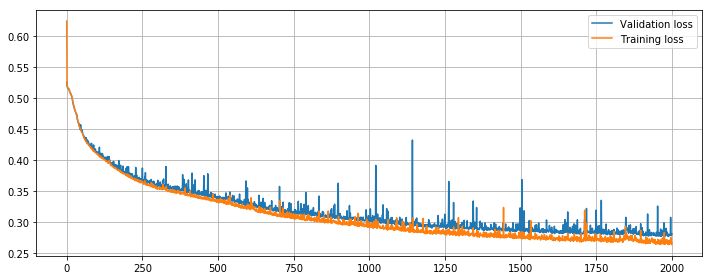

In [10]:
plt.figure(figsize=(10,4))
plt.plot(autoencoder.history.history['val_loss'], label='Validation loss')
plt.plot(autoencoder.history.history['loss'], label='Training loss')
plt.legend()
plt.grid()
plt.tight_layout()

In [11]:
autoencoder.load_weights(weight_path)

In [12]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [13]:
code = encoder.predict([VL_encoded, VH_encoded])

le = LabelEncoder().fit(animals_mask)
labels = le.transform(animals_mask)

unique_labels = np.unique(labels)

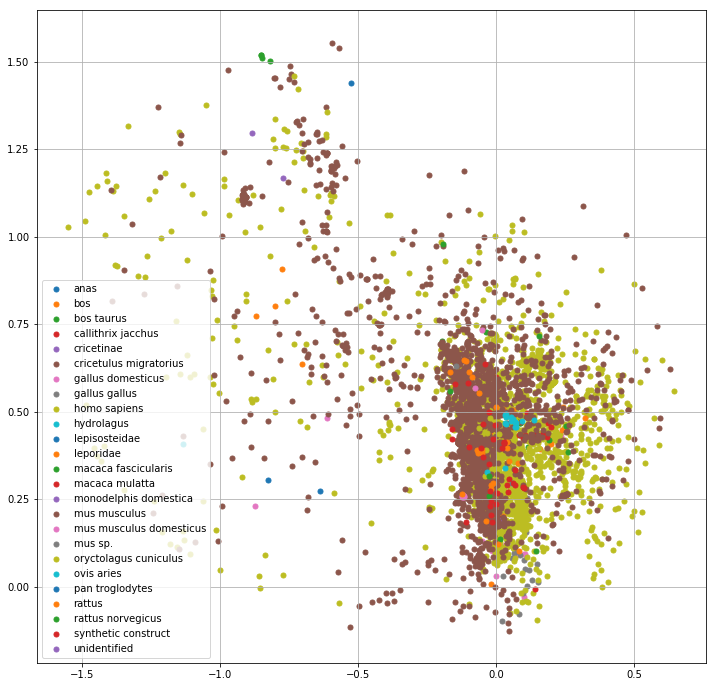

In [14]:
f, ax = plt.figure(figsize=(12,12))
for x in range(unique_labels.size):
    mask_labels = labels == unique_labels[x]
    ax.scatter(code[mask_labels,0], code[mask_labels,1], marker='.', label=le.classes_[x], s=100)
ax.legend()
ax.grid()

In [20]:
from abpytools import FabCollection, ChainCollection
import pandas as pd

combinations = pd.read_csv('/home/gil/PhD/UCB/precollection/random_pairs.txt', index_col=0, delimiter=', ')

heavy_chains = ChainCollection.load_from_json(path='/home/gil/PhD/UCB/CombinationData/AbFiles/heavy_chains.json')
light_chains = ChainCollection.load_from_json(path='/home/gil/PhD/UCB/CombinationData/AbFiles/light_chains.json')

heavy_chains_list=[]
light_chains_list=[]

for heavy, light in  combinations['Random Pairs'].str.split('-'):
    heavy_chains_list.append(heavy_chains.get_object(heavy))
    light_chains_list.append(light_chains.get_object(light))    
    
fab_collection = FabCollection(None, heavy_chains_list, light_chains_list,
                               names=['P' + str(x) for x in combinations.index.tolist()])

data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

VL_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Light'].values]
VH_data = [''.join(x).replace('-','') for x in fab_collection.numbering_table()['Heavy'].values]

VH_data_encoded = encode_sequences(VH_data, VH_LENGTH, DATASETS)
VL_data_encoded = encode_sequences(VL_data, VL_LENGTH, DATASETS)

VH_data_encoded = ss_VH.transform(VH_data_encoded)
VL_data_encoded = ss_VL.transform(VL_data_encoded)

code_1 = encoder.predict([VL_data_encoded, VH_data_encoded])

latent_data = pd.DataFrame(code_1, columns=[f"Latent{x}" for x in range(1, 21)], index=fab_collection.names)

data = pd.read_csv('/home/gil/PhD/UCB/Data/Tm/Processed Data/AllTmData.csv', index_col=0)
data.index = ['P' + str(x) for x in data.index]

data.dropna(axis=0, inplace=True, subset=[data.columns[0]])

data = data.join(latent_data)

data.head()

Loading in antibody objects


/home/gil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.



Failed to load 0 objects in list
Loading in antibody objects



Failed to load 0 objects in list
Loading in antibody objects



Failed to load 0 objects in list
Loading in antibody objects



Failed to load 0 objects in list


,Tm D - Mean,Tm D - Std. Error,Tm2 - Mean,Tm2 - Std. Error,Latent1,Latent2,Latent3,Latent4,Latent5,Latent6,...,Latent11,Latent12,Latent13,Latent14,Latent15,Latent16,Latent17,Latent18,Latent19,Latent20
P2,64.473820,0.000000,NaN,NaN,-0.155650,0.610558,-0.007413,-0.166460,-0.172703,-0.177045,...,-0.395414,1.074115,-0.023839,-0.497542,0.015845,-0.659805,0.203252,-0.533639,-0.160160,-0.317261
P3,73.982970,0.130358,NaN,NaN,-0.054404,0.441760,0.021270,-0.135422,-0.205372,-0.269380,...,-0.384386,1.093212,-0.157447,-0.686809,0.108813,-0.648487,0.182903,-0.459018,0.053687,-0.420251
P4,64.326010,0.060344,NaN,NaN,0.071654,0.436729,0.160189,-0.038600,-0.174409,-0.012858,...,-0.144420,0.854748,-0.046593,-0.381629,-0.019566,-0.604869,0.269730,-0.372893,0.028828,-0.086122
P6,74.192370,0.036953,NaN,NaN,0.145099,0.417355,0.090314,0.246216,0.125446,0.034931,...,0.066135,0.804953,-0.100188,-0.200025,0.278322,-0.314524,0.633840,-0.304855,0.238956,-0.172710
P9,72.899025,0.085337,NaN,NaN,0.038953,0.291852,0.147270,0.089386,-0.111208,-0.001681,...,0.033242,0.644544,0.013167,-0.097806,-0.117512,-0.324687,0.357149,-0.324778,0.089272,-0.014065


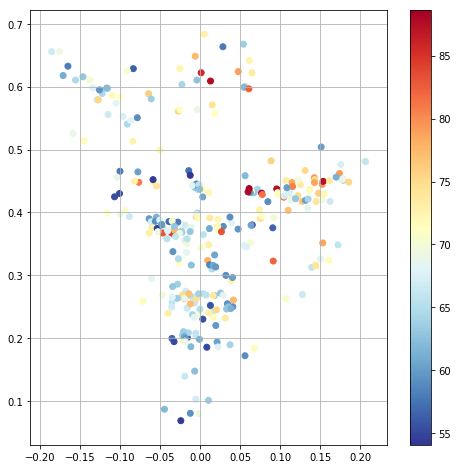

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(data['Latent1'], data['Latent2'], c=data['Tm D - Mean'].values, cmap='RdYlBu_r')
plt.colorbar()
plt.grid()

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [138]:
X = data[[x for x in data.columns if 'Latent' in x]].as_matrix()

/home/gil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [139]:
[x for x in np.argsort([np.var(X[:, x])/abs(np.mean(X[:,x])) for x in range(X.shape[1])])][::-1]

[0, 12, 14, 3, 6, 4, 13, 10, 18, 9, 8, 5, 7, 15, 19, 2, 1, 16, 11, 17]

In [140]:
norm_variance = [np.var(X[:, x])/abs(np.mean(X[:,x])) for x in range(X.shape[1])]

In [141]:
norm_variance

[0.5561884,
 0.04308821,
 0.049778957,
 0.23951541,
 0.18233024,
 0.09625346,
 0.23185705,
 0.07444872,
 0.102083996,
 0.12562913,
 0.14890237,
 0.025658084,
 0.5379126,
 0.15489082,
 0.4853397,
 0.064087346,
 0.042352173,
 0.023141032,
 0.12948193,
 0.053439334]

In [142]:
np.var(X[:, np.argsort(norm_variance)[::-1]], axis=0) / abs(np.mean(X[:, np.argsort(norm_variance)[::-1]], axis=0))

array([0.5561884 , 0.5379126 , 0.4853397 , 0.23951541, 0.23185705,
       0.18233024, 0.15489082, 0.14890237, 0.12948193, 0.12562913,
       0.102084  , 0.09625346, 0.07444872, 0.06408735, 0.05343933,
       0.04977896, 0.04308821, 0.04235217, 0.02565808, 0.02314103],
      dtype=float32)

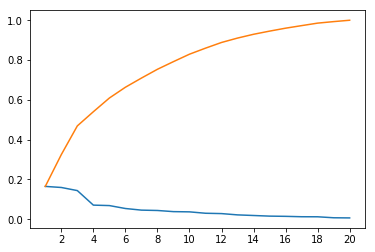

In [143]:
from matplotlib.ticker import MaxNLocator

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=11))

ax.plot(range(1, 21), [norm_variance[x]/sum(norm_variance) for x in np.argsort(norm_variance)[::-1]])
ax.plot(range(1, 21), np.cumsum([norm_variance[x]/sum(norm_variance) for x in np.argsort(norm_variance)[::-1]]))

In [144]:
X=X[:, np.argsort(norm_variance)[::-1]][:, :10]

In [145]:
X.shape

(304, 10)

In [155]:
ax

(<Figure size 432x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9cdc7c048>,
       dtype=object))

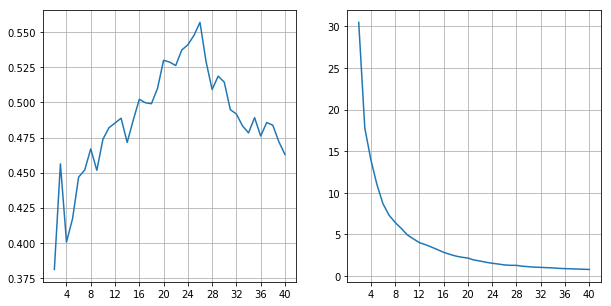

In [159]:
f, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].xaxis.set_major_locator(MaxNLocator(nbins=11))
ax[1].xaxis.set_major_locator(MaxNLocator(nbins=11))

s_scores = []
i_scores = []
for k in range(2, 41):
    kmeans = KMeans(n_clusters=k, random_state=0)
    s_scores.append(silhouette_score(X, kmeans.fit_predict(X)))
    i_scores.append(kmeans.inertia_)
ax[0].plot(range(2, 41), s_scores)
ax[1].plot(range(2, 41), i_scores)
ax[0].grid()
ax[1].grid()

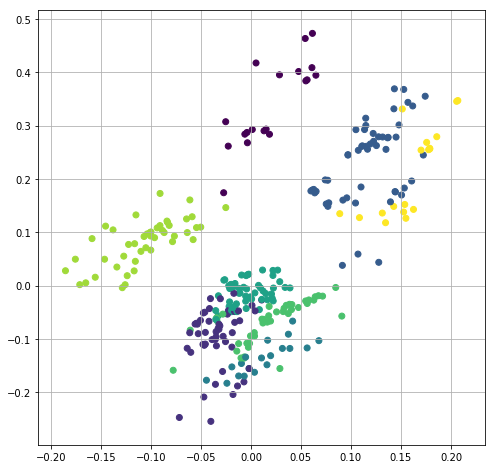

In [175]:
N_CLUSTERS = 8

kmeans = KMeans(N_CLUSTERS, random_state=0)
kmeans.fit(X)
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,2], c=kmeans.predict(X))
plt.grid()

/home/gil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


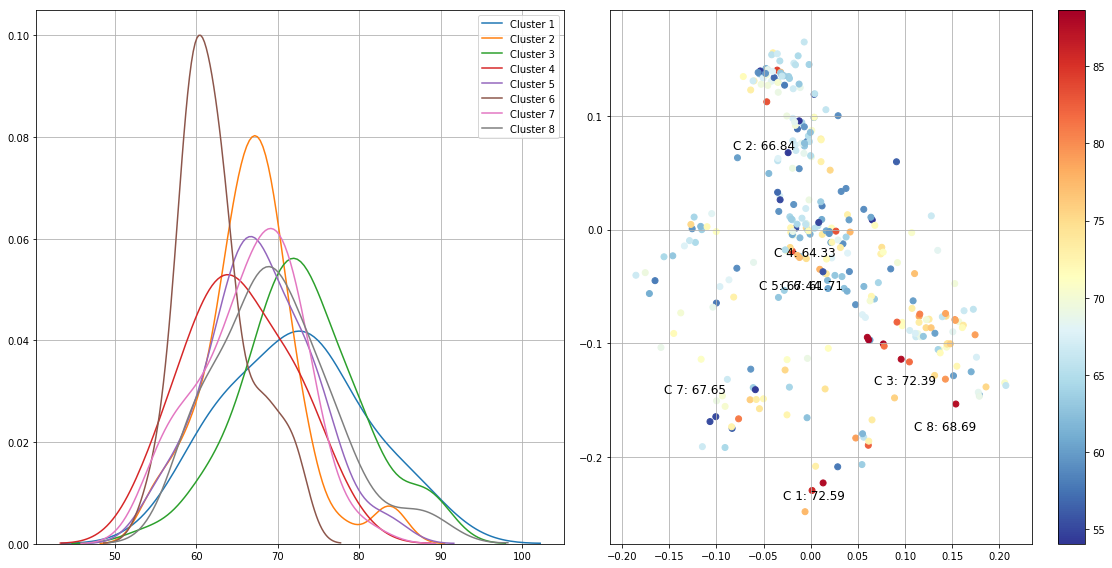

In [167]:
f, ax = plt.subplots(1,2,figsize=(16,8))
kmeans_labels = kmeans.predict(X) 
tms = ax[1].scatter(X[:,0], X[:,1], c=data['Tm D - Mean'].values, cmap='RdYlBu_r')
for x in range(N_CLUSTERS):
    ax[1].text(kmeans.cluster_centers_[x][0]-.05, kmeans.cluster_centers_[x][1]-.06,
               'C {}: {:.2f}'.format(x+1, np.median(data.values[kmeans_labels==x, 0])), fontsize=12)
cbar = f.colorbar(tms)
ax[1].grid()
for x in range(N_CLUSTERS):
    sns.distplot(data.values[kmeans_labels==x, 0], ax=ax[0], hist=False, label='Cluster {}'.format(x+1))
ax[0].legend()
ax[0].grid()
#     print(data.values[kmeans_labels==x, 0].mean(), data.values[kmeans_labels==x, 0].std())
plt.tight_layout()

In [176]:
lambda_kappa = fab_collection.germline['Light']['Assignment'].apply(lambda x: 1 if x.startswith('IGL') else 0).values
lambda_kappa = lambda_kappa[[fab_collection.names.index(name) for name in data.index]]
heavy_germline = fab_collection.germline['Heavy']['Assignment'].apply(lambda x: int(x.split('-')[0][-1])).values
heavy_germline = heavy_germline[[fab_collection.names.index(name) for name in data.index]]

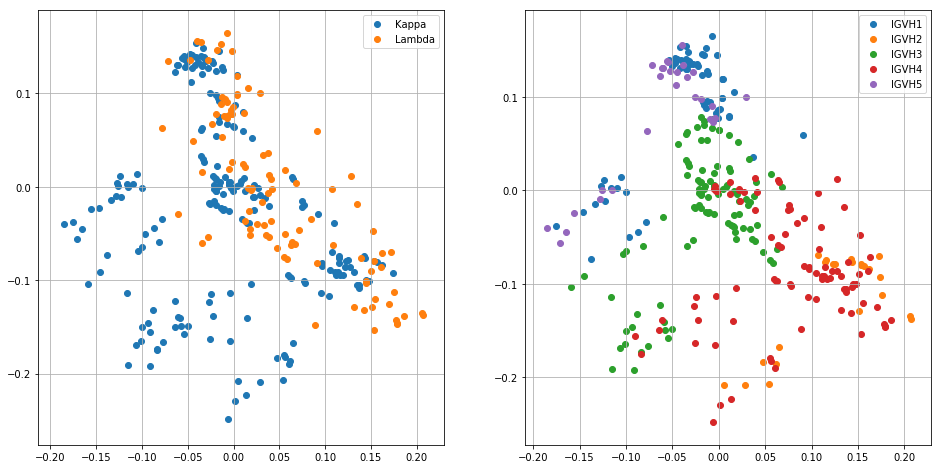

In [177]:
f, ax = plt.subplots(1,2,figsize=(16,8))
for x in range(2):
    mask_labels = lambda_kappa == x
    if x == 0:
        label = 'Kappa'
    else:
        label = 'Lambda'
    ax[0].scatter(X[:,0][mask_labels], X[:,1][mask_labels], 
                label=label)
ax[0].legend()
ax[0].grid()
    
for x in np.unique(heavy_germline):
    mask_labels = heavy_germline == x
    ax[1].scatter(X[:,0][mask_labels], X[:,1][mask_labels], 
                label='IGVH{}'.format(x))
ax[1].legend()
ax[1].grid()

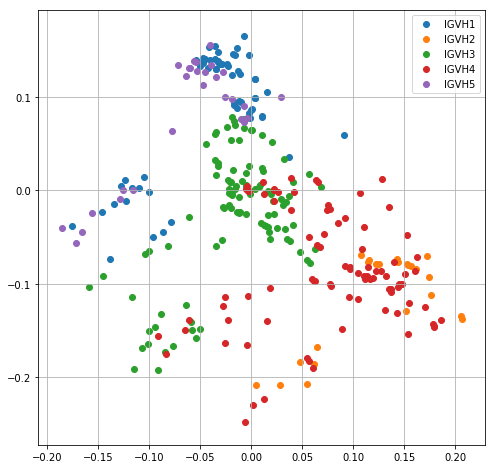

In [184]:
plt.figure(figsize=(8,8))
for x in np.unique(heavy_germline):
    mask_labels = heavy_germline == x
    plt.scatter(X[:,0][mask_labels], X[:,1][mask_labels],
                label='IGVH{}'.format(x))
plt.legend()
plt.grid()

In [180]:
silhouette_score(X, heavy_germline)

0.0612416

In [181]:
silhouette_score(X, lambda_kappa)

0.08090417